# t-tests, ANOVA and non-parametric tests

In [1]:
import pandas as pd
from scipy import stats 

Worldbank_upd.xlsx file contains World Bank data by countries for 2018 and 2019.

**Description of variables**

- CountryName	- Country Name
- CountryCode	- Country Code
- high_income	- High income countries (Takes 2 values: 1 - belongs to the high income group of countries, 0 - no)
- income	- Income (Takes 3 values: high income, middle income, low income)
- development	- Developed or developing country (Takes 2 values: developing, developed)

**Variables with data for 2018:**
- Agriculturalrawmaterialsexpor	- Agricultural raw materials exports (% of merchandise exports)
- ArmsexportsSIPRItrendindica	- Arms exports (SIPRI trend indicator values)
- Commercialserviceexportscurr	- Commercial service exports (current US dollars)
- Communicationscomputeretc	- Communications, computer, etc. (% of service exports, BoP)
- Exportsofgoodsandservices	- Exports of goods and services (% of GDP) 
- Exportsofgoodsandservicesa - Exports of goods and services (annual percent growth) 
- ExportsofgoodsandservicesB - Exports of goods and services (BoP, current US dollars) 
- Exportsofgoodsandservicesc - Exports of goods and services (constant 2010 US dollars) 
- Foodexportsofmerchandisee	- Food exports (% of merchandise exports) 
- GoodsexportsBoPcurrentUS	- Goods exports (BoP, current US dollars) 
- Fuelexportsofmerchandisee	- Fuel exports (% of merchandise exports) 
- Hightechnologyexportsofma	- High-technology exports (% of manufactured exports)
- Hightechnologyexportscurrent	- High-technology exports (current US dollars) 
- TaxesonexportscurrentLCU	- Taxes on exports (current LCU) 
- Transportservicesofservice	- Transport services (% of service exports, BoP)
- Travelservicesofcommercial	- Travel services (% of commercial service exports)
- Travelservicesofserviceex	- Travel services (% of service exports, BoP)


**Variables with data for 2019**
- Travelservicesofcommercial2019 - Travel services (% of commercial service exports)
- Agriculturalrawmaterialsexpo2019 -  Agricultural raw materials exports (% of merchandise exports)
- Communicationscomputeretc2019 - Communications, computer, etc. (% of service imports, BoP)
- Transportservicesofservice2019 - Transport services (% of service exports, BoP)

In [2]:
df = pd.read_excel('Worldbank_upd.xlsx')
df

,CountryName,CountryCode,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,...,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex,high_income,income,development,Travelservicesofcommercial2019,Agriculturalrawmaterialsexpo2019,Communicationscomputeretc2019,Transportservicesofservice2019
0,Afghanistan,AFG,17.113304,NaN,6.230657e+08,28.402324,NaN,NaN,1.611540e+09,NaN,...,24.602029,4.482772,3.793358,0,low income,developing,14.367959,NaN,6.467647,16.344074
1,Albania,ALB,0.313849,NaN,3.574339e+09,16.058391,31.684671,3.196598,4.784712e+09,4.807222e+09,...,8.443837,61.150507,60.361848,0,middle income,developing,62.216690,NaN,5.979548,7.154605
2,Algeria,DZA,NaN,NaN,NaN,NaN,25.623547,-4.300000,NaN,5.296803e+10,...,NaN,NaN,NaN,0,middle income,developing,NaN,NaN,NaN,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,68.867925,14.325843,NaN,3.321704e+08,...,NaN,NaN,NaN,0,middle income,developing,NaN,NaN,NaN,NaN
4,Andorra,AND,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,high income,developed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,high income,developing,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,NaN,NaN,5.608593e+08,36.257881,19.865352,7.878720,2.903485e+09,2.456322e+09,...,1.625164,43.720375,40.034937,0,middle income,developing,45.238319,0.913553,10.780279,1.079660
214,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,low income,developing,NaN,0.017167,NaN,NaN
215,Zambia,ZMB,0.903647,NaN,9.532642e+08,3.739193,37.422550,NaN,9.982666e+09,NaN,...,5.641202,77.857990,77.857990,0,middle income,developing,80.805321,1.332663,9.384435,4.395867


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CountryName                       217 non-null    object 
 1   CountryCode                       217 non-null    object 
 2   Agriculturalrawmaterialsexpor     126 non-null    float64
 3   ArmsexportsSIPRItrendindica       40 non-null     float64
 4   Commercialserviceexportscurr      164 non-null    float64
 5   Communicationscomputeretc         159 non-null    float64
 6   Exportsofgoodsandservices         168 non-null    float64
 7   Exportsofgoodsandservicesa        151 non-null    float64
 8   ExportsofgoodsandservicesB        163 non-null    float64
 9   Exportsofgoodsandservicesc        148 non-null    float64
 10  Foodexportsofmerchandisee         127 non-null    float64
 11  GoodsexportsBoPcurrentUS          164 non-null    float64
 12  Fuelexpo

# Descriptive Statistics and Graphs

In [4]:
df.pivot_table(index='income', values=['Travelservicesofserviceex'], aggfunc=['mean', 'std'])
#We can see the mean and the standard deviation of the variable Travel services (% of service exports) in three country groups

,mean,std
,Travelservicesofserviceex,Travelservicesofserviceex
income,,
high income,32.802454,22.581276
low income,34.703687,28.395078
middle income,50.091685,23.630570


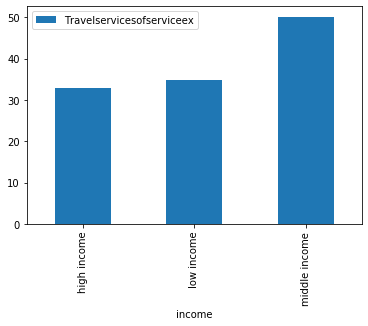

In [6]:
df.groupby('income')[['Travelservicesofserviceex']].mean().plot(kind='bar')
#mean values of Travel services (% of service exports) in three income groups

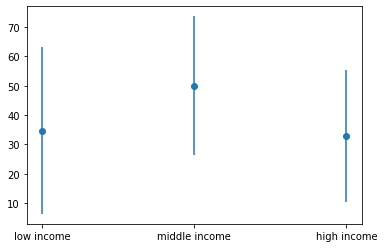

In [7]:
import matplotlib.pyplot as plt
x = ['low income', 'middle income', 'high income']
y = [df[df.income=='low income']['Travelservicesofserviceex'].mean(), df[df.income=='middle income']['Travelservicesofserviceex'].mean(), df[df.income=='high income']['Travelservicesofserviceex'].mean()]
e = [df[df.income=='low income']['Travelservicesofserviceex'].std(), df[df.income=='middle income']['Travelservicesofserviceex'].std(), df[df.income=='high income']['Travelservicesofserviceex'].std()]
plt.errorbar(x, y, yerr=e, fmt='o')
plt.show()
#The graph is called "Error bars". It shows the mean and the standard deviation in each group

## Normality Test

In [8]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Travelservicesofserviceex'])
stats.kstest(df.Travelservicesofserviceex, 'norm', args=(df.Travelservicesofserviceex.mean(), df.Travelservicesofserviceex.std()))

KstestResult(statistic=0.08336118017262845, pvalue=0.2015993092471272)

H1: The distribution of *Travel services (% of service exports)* variable is different from the normal distribution

H0: The distribution of *Travel services (% of service exports)* variable is not different from the normal distribution

Conclusion: as p-value > 0.05, H1 is rejected => the distribution is not significantly different from normal

It means that t-tests can be used to compare mean values of the variable in groups.

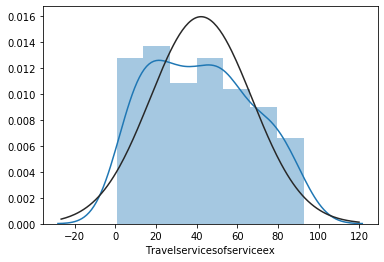

In [9]:
import seaborn as sns 
sns.distplot(df.Travelservicesofserviceex, fit=stats.norm)  

# Independent-samples t-test

In [10]:
df.groupby('high_income')['Travelservicesofserviceex'].describe()
#compare vales of Travel services (% of service exports) in 2 groups of countries (high income and others)

,count,mean,std,min,25%,50%,75%,max
high_income,,,,,,,,
0,102.0,47.677881,24.926204,0.674764,28.292903,50.277136,69.668599,91.810856
1,59.0,32.802454,22.581276,2.904751,13.264232,25.959672,47.836613,92.670309


In [11]:
group1 = df[df['high_income']==0]['Travelservicesofserviceex']
group2 = df[df['high_income']==1]['Travelservicesofserviceex']

In [12]:
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=3.7741113108241766, pvalue=0.00022629507895983235)

H1: Mean values of the *percent of travel services out of service exports* for high income countries and other countries are different.

p-value < 0.05, H1 is accepted, there is a statistically significant difference in mean values of the dependent variable in the two groups

### Levene's Test for Equality of Variances 

In [13]:
stats.levene(group1, group2)

LeveneResult(statistic=1.523384923263628, pvalue=0.2189290895038922)

H1: Variances of the *percent of travel services out of service exports* for high income countries and other countries are different.

p-value > 0.05, H1 is rejected, variances in two groups are not different

In [14]:
stats.ttest_ind(group1, group2, equal_var=False) #if variances are different
#in this case a t-test with Welch correction is calculated
#the degrees of freedom are calculated differently, they are less than in the standard t-test calculation

Ttest_indResult(statistic=3.875341678083777, pvalue=0.00016743177615007949)

# One-sample t-test

In [15]:
stats.ttest_1samp(df['Travelservicesofserviceex'].dropna(), 40)

Ttest_1sampResult(statistic=1.1267449103278864, pvalue=0.2615373786541348)

H1: Mean value of the *percent of travel services out of service exports* is different from 40
p-value > 0.05, H1 is rejected

In [16]:
stats.ttest_1samp(df['Travelservicesofserviceex'].dropna(), 140)

Ttest_1sampResult(statistic=-49.476227090249566, pvalue=6.904596284425387e-99)

H1: Mean value of the *percent of travel services out of service exports* is different from 140
p-value < 0.05, H1 is accepted

# Paired-samples t-test 

### Normality Test

In [17]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Travelservicesofcommercial'])
stats.kstest(df.Travelservicesofcommercial, 'norm', args=(df.Travelservicesofcommercial.mean(), df.Travelservicesofcommercial.std()))

KstestResult(statistic=0.09553969641122728, pvalue=0.09907565566329135)

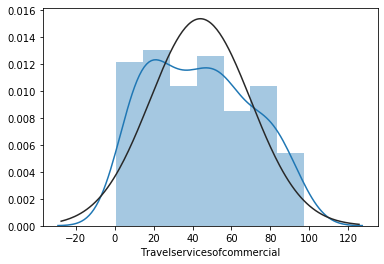

In [18]:
sns.distplot(df.Travelservicesofcommercial, fit=stats.norm)  

In [19]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Travelservicesofcommercial2019'])
stats.kstest(df.Travelservicesofcommercial2019, 'norm', args=(df.Travelservicesofcommercial2019.mean(), df.Travelservicesofcommercial2019.std()))

KstestResult(statistic=0.10719599483561548, pvalue=0.09146201642540364)

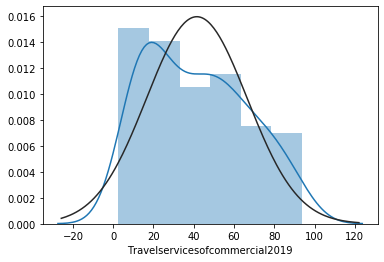

In [20]:
sns.distplot(df.Travelservicesofcommercial2019, fit=stats.norm)  

The distribution of the variable *Travel services (% of commercial service exports)* both in 2018 and in 2019 was not different from normal.

In [21]:
df = df.dropna(subset=['Travelservicesofcommercial'])
df = df.dropna(subset=['Travelservicesofcommercial2019'])
stats.ttest_rel(df['Travelservicesofcommercial2019'], df['Travelservicesofcommercial'])

Ttest_relResult(statistic=0.6699875444020236, pvalue=0.50407262798285)

H1: Mean values of the *percent of travel services out of commercial service exports* for countries in 2018 and in 2019 are different.

p-value > 0.05, H1 is rejected, mean values are not different

# ANOVA

In [22]:
group_high = df[df['income']=='high income']['Travelservicesofserviceex']
group_low = df[df['income']=='low income']['Travelservicesofserviceex']
group_middle = df[df['income']=='middle income']['Travelservicesofserviceex']

In [23]:
stats.f_oneway(group_high, group_low, group_middle)

F_onewayResult(statistic=10.470395287625397, pvalue=6.214052225384186e-05)

H1: the mean values of the *percent of travel services out of service exports* for groups of countries based on income are different

p-value < 0.05, means are different

Pairwise post-hoc testing will determine whether there is a difference between the means of all possible pairs (all pairwise comparisons).

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Travelservicesofserviceex'], df['income']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
high income    low income -11.7664 0.4381 -34.4083 10.8755  False
high income middle income  16.0796  0.001     6.52 25.6392   True
 low income middle income   27.846 0.0105   5.4515 50.2404   True
-----------------------------------------------------------------


According to the results of the post-hoc test, statistically significant differences in the mean values of *Travel services (% of service exports) *are observed between high income and middle income groups, as well as between low income and middle income groups. 

# Non-parametric tests 

## Normality Test

In [25]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Agriculturalrawmaterialsexpor'])
stats.kstest(df.Agriculturalrawmaterialsexpor, 'norm', args=(df.Agriculturalrawmaterialsexpor.mean(), df.Agriculturalrawmaterialsexpor.std()))

KstestResult(statistic=0.347901815635626, pvalue=3.924587324163506e-14)

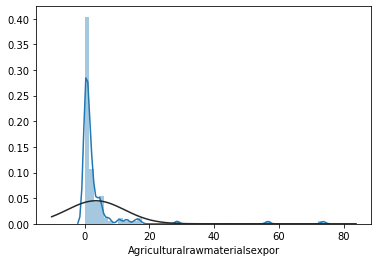

In [26]:
import seaborn as sns 
sns.distplot(df.Agriculturalrawmaterialsexpor, fit=stats.norm)  

As the distribution of the variable *Agricultural raw materials exports (% of merchandise exports)* is significantly different from normal, to compare the values of the variable in different groups nonparametric tests should be used.

# Mann-Whitney U Test

In [27]:
df = pd.read_excel('Worldbank_upd.xlsx')
group1 = df[df['high_income']==0]['Agriculturalrawmaterialsexpor']
group2 = df[df['high_income']==1]['Agriculturalrawmaterialsexpor']

In [28]:
stats.mannwhitneyu(group1.dropna(), group2.dropna())

MannwhitneyuResult(statistic=2372.0, pvalue=0.04713364008178049)

H1: Values of the variable *Agricultural raw materials exports (% of merchandise exports)* for high income countries and other countries are different.

p-value < 0.05, H1 is accepted


# Wilcoxon signed-rank test

In [29]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Agriculturalrawmaterialsexpor'])
stats.kstest(df.Agriculturalrawmaterialsexpor, 'norm', args=(df.Agriculturalrawmaterialsexpor.mean(), df.Agriculturalrawmaterialsexpor.std()))

KstestResult(statistic=0.347901815635626, pvalue=3.924587324163506e-14)

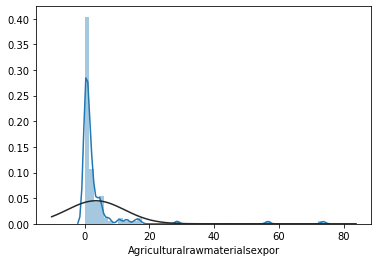

In [30]:
sns.distplot(df.Agriculturalrawmaterialsexpor, fit=stats.norm)  

In [31]:
df = pd.read_excel('Worldbank_upd.xlsx')
stats.kstest(df.Agriculturalrawmaterialsexpo2019.dropna(), 'norm', args=(df.Agriculturalrawmaterialsexpo2019.mean(), df.Agriculturalrawmaterialsexpo2019.std()))

KstestResult(statistic=0.32723067689605356, pvalue=1.0454902400581402e-12)

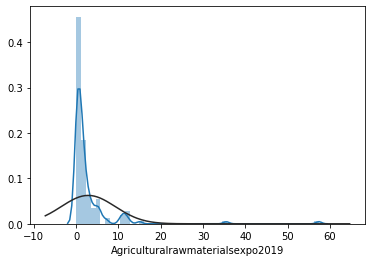

In [34]:
sns.distplot(df.Agriculturalrawmaterialsexpo2019.dropna(), fit=stats.norm)  

The distribution of the variable *Agricultural raw materials exports (% of merchandise exports)* both in 2018 and in 2019 was different from normal.

In [35]:
df = pd.read_excel('Worldbank_upd.xlsx')
df = df.dropna(subset=['Agriculturalrawmaterialsexpor'])
df = df.dropna(subset=['Agriculturalrawmaterialsexpo2019'])
stats.wilcoxon(df['Agriculturalrawmaterialsexpor'], df['Agriculturalrawmaterialsexpo2019'])

WilcoxonResult(statistic=2261.0, pvalue=0.025972469414897743)

H1: Values of the variable *Agricultural raw materials exports (% of merchandise exports)* for countries in 2018 and in 2019 are different.

p-value < 0.05, H1 is accepted

# Kruskal-Wallis test

In [36]:
group_high = df[df['income']=='high income']['Agriculturalrawmaterialsexpor']
group_low = df[df['income']=='low income']['Agriculturalrawmaterialsexpor']
group_middle = df[df['income']=='middle income']['Agriculturalrawmaterialsexpor']

In [37]:
stats.kruskal(group_high, group_low, group_middle)

KruskalResult(statistic=2.8498658170632893, pvalue=0.24052459981559898)

H1: Values of the variable *Agricultural raw materials exports (% of merchandise exports)* for groups of countries based on income are different.

p-value < 0.05, H1 is accepted

To find out in which groups the values differ, we can conduct Mann-Whitney tests between all possible pairs of groups.

In [38]:
from itertools import combinations
list_groups = ['group_high', 'group_low', 'group_middle']
for a, b in combinations(list_groups, 2):
    print(f'{a} and {b}:', stats.mannwhitneyu(eval(a), eval(b))[1])

group_high and group_low: 0.28447275994445803
group_high and group_middle: 0.14838613307206683
group_low and group_middle: 0.5768410926305664


According to the results, statistically significant differences in the values of the variable *Agricultural raw materials exports (% of merchandise exports)* are observed between high income and middle income groups, as well as between low income and middle income groups.